In [3]:
import base64
import os
import json
import requests
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
CLASSIFICATION_ENDPOINT = 'http://p27.arquivo.pt:9080/safeimage'
#N_DATA_VALIDATION_PATH = '/home/dbicho/Documents/FilterProject/validation_images/NotSafe/'
#S_DATA_VALIDATION_PATH = '/home/dbicho/Documents/FilterProject/validation_images/Safe/'
S_DATA_VALIDATION_PATH = '/home/dbicho/Documents/FilterProject/validation_images_1/Safe/'
N_DATA_VALIDATION_PATH = '/home/dbicho/Documents/FilterProject/validation_images_1/NotSafe/'

labels = []
scores = []

number_of_n = 0
number_of_s = 0
scores_list_n = []
scores_list_s = []

for path in os.listdir(N_DATA_VALIDATION_PATH):    
    image_file_path = os.path.join(N_DATA_VALIDATION_PATH,path)    
    if os.path.isfile(image_file_path):        
        # classify
        with open(image_file_path) as file:
            image_64 = base64.b64encode(file.read())
            json_data = {"image": image_64}
            response = requests.post(CLASSIFICATION_ENDPOINT, json=json_data)            
            response_json = json.loads(response.content)            
            scores_list_n.append(float(response_json["NSFW"]))
            number_of_n += 1
            
for path in os.listdir(S_DATA_VALIDATION_PATH):    
    image_file_path = os.path.join(S_DATA_VALIDATION_PATH,path)    
    if os.path.isfile(image_file_path):        
        # classify
        with open(image_file_path) as file:
            image_64 = base64.b64encode(file.read())
            json_data = {"image": image_64}
            response = requests.post(CLASSIFICATION_ENDPOINT, json=json_data)            
            response_json = json.loads(response.content)            
            scores_list_s.append(float(response_json["NSFW"]))
            number_of_s += 1

In [5]:
y_true = np.hstack((np.zeros(number_of_s),np.ones(number_of_n)))
scores = np.hstack((np.asarray(scores_list_s),np.asarray(scores_list_n)))

In [11]:
fpr, tpr, thresholds = metrics.roc_curve(y_true, scores, pos_label=1)
AUC = metrics.roc_auc_score(y_true, scores)
#CF = metrics.confusion_matrix(y_true, scores)

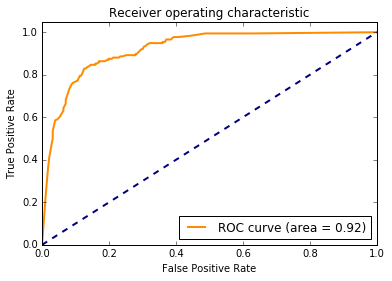

In [9]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()